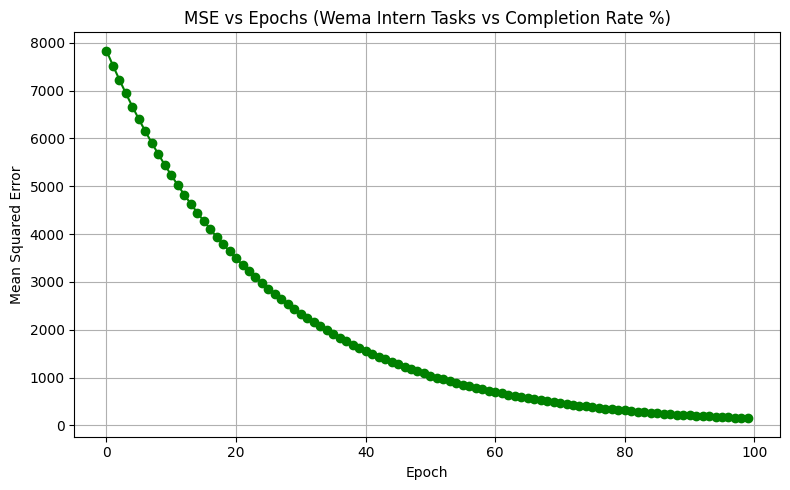

Final Weight: 7.260
Final Bias: 76.399
Final MSE: 147.383


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# --- Step 1: Generate Synthetic Data for Intern Tasks ---
np.random.seed(42)
intern_tasks = np.random.randint(1, 13, size=(50, 1))  # Intern completes between 1–12 tasks/week
completion_rate = 70 + 2.5 * intern_tasks + np.random.normal(0, 2, size=(50, 1))  # Add noise

# --- Step 2: Normalize Design Matrix ---
scaler = StandardScaler()
X_normalized = scaler.fit_transform(intern_tasks)

# Optional: Save normalized data
np.save("X_Wema_normalized.npy", X_normalized)

# --- Step 3: Define MSE and Gradient Descent ---
def mean_squared_error(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

def gradient_descent(X, y, w_init=0.0, b_init=0.0, lr=0.01, epochs=100):
    w, b = w_init, b_init
    m = len(y)
    mse_history = []

    for _ in range(epochs):
        y_pred = w * X + b
        error = y_pred - y
        dw = (2 / m) * np.sum(error * X)
        db = (2 / m) * np.sum(error)

        w -= lr * dw
        b -= lr * db

        mse_history.append(mean_squared_error(y_pred, y))

    return w, b, mse_history

# --- Step 4: Train Linear Regression Model ---
final_weight, final_bias, mse_history = gradient_descent(X_normalized, completion_rate)

# --- Step 5: Plot MSE Over Epochs ---
plt.figure(figsize=(8, 5))
plt.plot(mse_history, marker='o', color='green')
plt.title("MSE vs Epochs (Wema Intern Tasks vs Completion Rate %)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Step 6: Display Final Model Parameters ---
print(f"Final Weight: {final_weight:.3f}")
print(f"Final Bias: {final_bias:.3f}")
print(f"Final MSE: {mse_history[-1]:.3f}")
